# **Marcel Kurniawan**

# **Import dataset yang dibutuhkan**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from PIL import Image
import fnmatch

# **2a. EDA & Data Preprocessing**

Membuat variabel yang menuju ke direktori dataset

In [ ]:
batik_bali_dir = '/content/drive/MyDrive/Dataset2A/batik-bali'
batik_betawi_dir = '/content/drive/MyDrive/Dataset2A/batik-betawi'
batik_celup_dir = '/content/drive/MyDrive/Dataset2A/batik-celup'
batik_cendrawasih_dir = '/content/drive/MyDrive/Dataset2A/batik-cendrawasih'
batik_ceplok_dir = '/content/drive/MyDrive/Dataset2A/batik-ceplok'

Melakukan resize gambar menjadi 64 x 64

In [ ]:
def assign_label(img,batik_type):
    return batik_type

In [ ]:
X=[]
Z=[]
img_size=64

def make_train_data(batik_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img, '*.jpg'):
            label=assign_label(img,batik_type)
            path = os.path.join(DIR,img)
            img = load_img(path, target_size = (img_size, img_size))

            X.append(np.array(img))
            Z.append(str(label))

Melakukan import dataset

In [ ]:
make_train_data('batik_bali',batik_bali_dir)

100%|██████████| 50/50 [00:28<00:00,  1.76it/s]


In [ ]:
make_train_data('batik_betawi',batik_betawi_dir)

100%|██████████| 50/50 [00:24<00:00,  2.01it/s]


In [ ]:
make_train_data('batik_celup',batik_celup_dir)

100%|██████████| 50/50 [00:24<00:00,  2.07it/s]


In [ ]:
make_train_data('batik_cendrawasih',batik_cendrawasih_dir)

100%|██████████| 50/50 [00:24<00:00,  2.04it/s]


In [ ]:
make_train_data('batik_ceplok',batik_ceplok_dir)


100%|██████████| 48/48 [00:25<00:00,  1.87it/s]


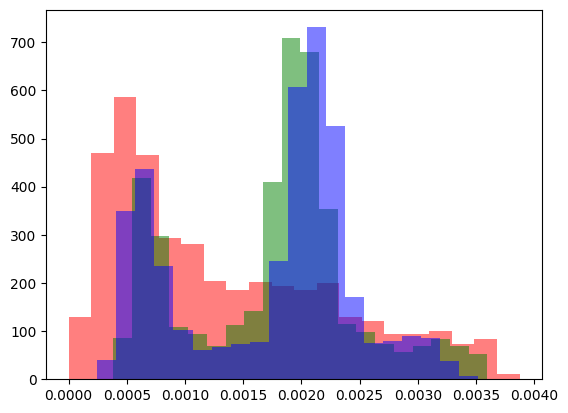

In [ ]:
x_train_warna = X_train.astype('float32') / 255.0
x_test_warna = X_test.astype('float32') / 255.0

plt.hist(x_train_warna[0,:,:,0].flatten(), bins=20, alpha=0.5, color='red')
plt.hist(x_train_warna[0,:,:,1].flatten(), bins=20, alpha=0.5, color='green')
plt.hist(x_train_warna[0,:,:,2].flatten(), bins=20, alpha=0.5, color='blue')
plt.show()

Histogram yang menunjukan distribusi warna

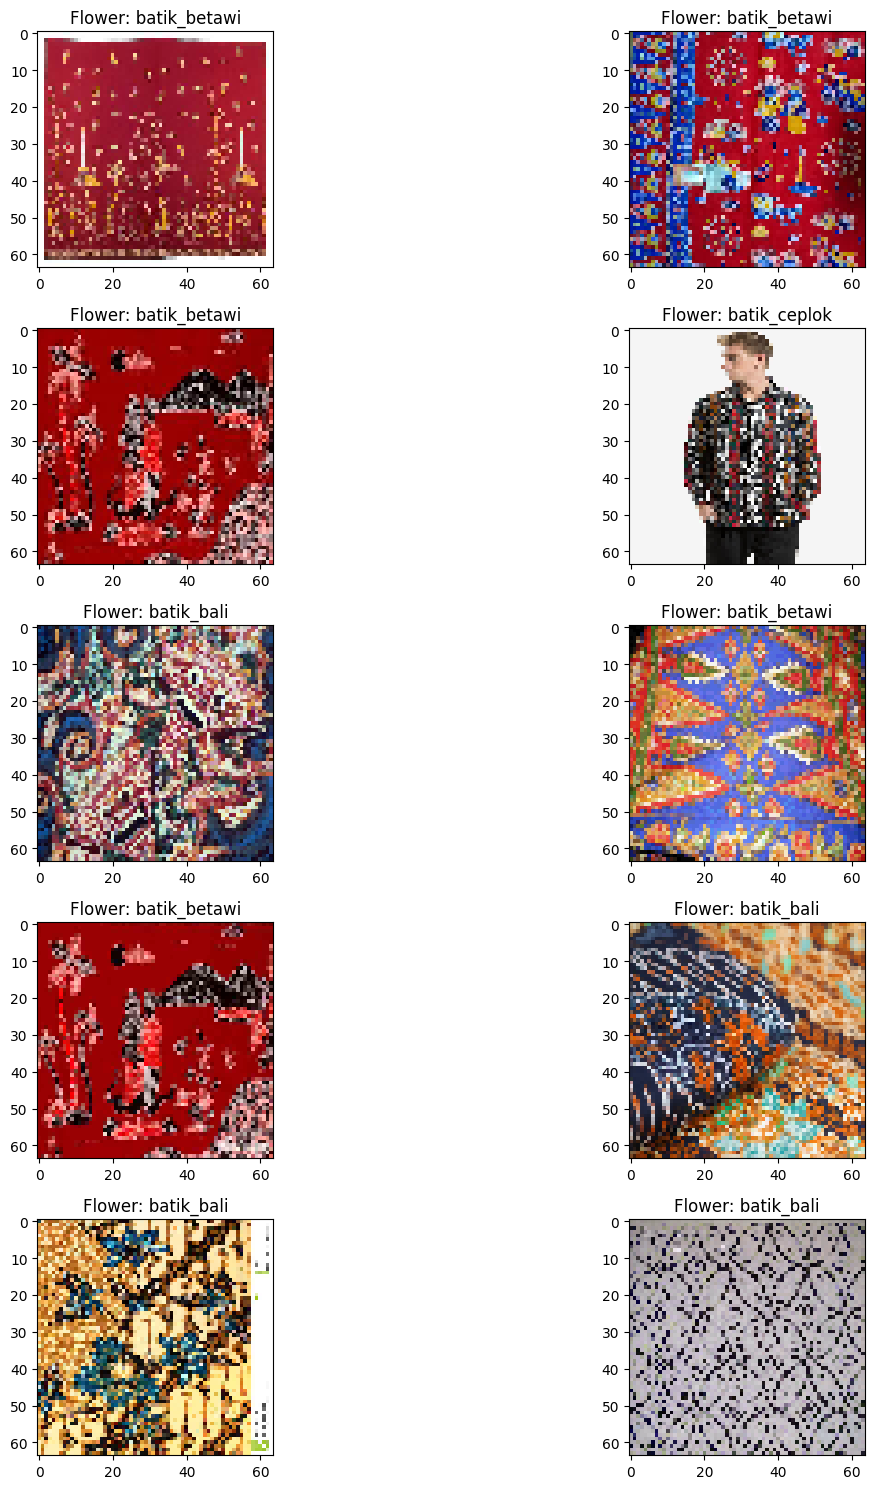

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

Menampilkan berbagai image random yang telah di import

# **2b. Memisahkan dataset menjadi 80% training set, 10% validation set dan 10% test set**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)
print("Training: ", len(X_train))
print("Validation: ", len(X_val))
print("Test: ",len(X_test))

Training:  198
Validation:  25
Test:  25


# **2c. Arsitektur Baseline sesuai dengan gambar arsitektur AlexNet berikut 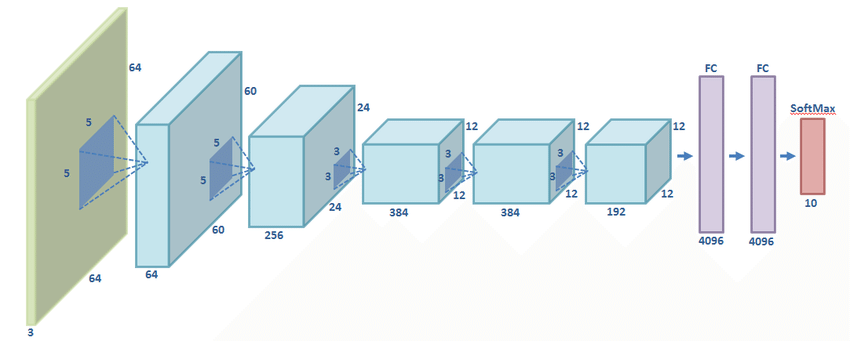**

Sesuai dengan arsitektur baseline dari AlexNet yang terdapat maxpooling layer setelah konvolusi ke 1, 2 dan ke 5, dengan begitu output yang didapatkan sesuai dengan gambar arsitektur AlexNet diatas. Sedangkan untuk optimizer sendiri saya menggunakan adam dikarenakan adam merupakan optimizer yang cukup baik untuk klasifikasi.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_2c = Sequential()

model_2c.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', input_shape=(img_size, img_size, 3)))
model_2c.add(MaxPooling2D(pool_size=(14, 14), strides=(2, 2)))
model_2c.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'))
model_2c.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2c.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model_2c.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model_2c.add(Conv2D(192, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model_2c.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model_2c.add(Flatten())
model_2c.add(Dense(4096, activation='relu'))
model_2c.add(Dense(4096, activation='relu'))
model_2c.add(Dense(5, activation='softmax'))

model_2c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       409856    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 384)       1

In [ ]:
history = model_2c.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
7/7 [==============================] - 34s 5s/step - loss: 6.0054 - accuracy: 0.1465 - val_loss: 1.6127 - val_accuracy: 0.2000
Epoch 2/5
7/7 [==============================] - 38s 6s/step - loss: 1.6109 - accuracy: 0.1919 - val_loss: 1.6134 - val_accuracy: 0.2400
Epoch 3/5
7/7 [==============================] - 30s 4s/step - loss: 1.6071 - accuracy: 0.2020 - val_loss: 1.6207 - val_accuracy: 0.2400
Epoch 4/5
7/7 [==============================] - 31s 4s/step - loss: 1.6031 - accuracy: 0.2071 - val_loss: 1.6527 - val_accuracy: 0.2400
Epoch 5/5
7/7 [==============================] - 31s 4s/step - loss: 1.6082 - accuracy: 0.2071 - val_loss: 1.6152 - val_accuracy: 0.0800


Hasil dari model_2c

# **2d. Modifikasi Arsitektur AlexNet**

Saya memodifikasi arsitektur diatas dengan menghilangkan Maxpool layer dan menambahkan layer baru seperti batch_normalization dan juga drop out layer, saya juga melakukan tuning terhadap kernel size, filter dan juga epoch.

Disini saya mengikuti beberapa arsitektur AlexNet yang umum seperti menambahkan batch normalization, droop out layer dan ukuran filter dan sejumlah kernel

Alasan saya melakukan hal tersebut adalah:


*   Saya menambahkan batch normalization karena batch normalization menormalisasi output dari setiap layer, sehingga dapat mencegah nilai yang sangat besar atau sangat kecil serta meningkatkan performa model pada dataset yang lebih kompleks dan mempercepat konvergensi training.
*   Saya menambah drop out layer karena dapat membantu mencegah overfitting dan mengurangi ketergantungan pada fitur tertentu dengan mematikan sejumlah neuron secara acak pada saat training serta meningkatkan performa model pada dataset yang lebih kompleks dan mempercepat konvergensi training.
*   Saya  mengadopsi ukuran sebagian arsitektur AlexNet seperti ukuran filter dan beberapa kernel karena arsitektur baseline AlexNet sudah cukup baik untuk melakukan multiclass image clssification.
*   Saya menghapus maxpooling karena ukuran resolusi gambar yang terlalu kecil, sehingga apabila menggunakn maxpooling akan banyak informasi yang terlewat dari data tersebut
*   Saya menambahkan epochnya menjadi 10 untuk meningkatkan akurasi model dan meminimalkan kesalahan dalam prediksi.










In [ ]:
from tensorflow import keras

model_2d = Sequential()

model_2d.add(Conv2D(96, (11, 11), strides=(1, 1), activation='relu', input_shape=(img_size, img_size, 3)))
model_2d.add(BatchNormalization())
model_2d.add(Conv2D(256, (5, 5), strides=(2, 2), activation='relu', padding='same'))
model_2d.add(BatchNormalization())
model_2d.add(Conv2D(384, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model_2d.add(BatchNormalization())
model_2d.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model_2d.add(BatchNormalization())
model_2d.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'))
model_2d.add(BatchNormalization())
model_2d.add(Flatten())
model_2d.add(Dense(4096, activation='relu'))
model_2d.add(Dropout(0.3))
model_2d.add(Dense(4096, activation='relu'))
model_2d.add(Dropout(0.3))
model_2d.add(Dense(5, activation='softmax'))

model_2d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 384)       885120    
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 384)     

In [ ]:
history = model_2d.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
7/7 [==============================] - 76s 10s/step - loss: 32.1169 - accuracy: 0.2121 - val_loss: 31.1405 - val_accuracy: 0.2400
Epoch 2/10
7/7 [==============================] - 72s 10s/step - loss: 15.3486 - accuracy: 0.2222 - val_loss: 50.0056 - val_accuracy: 0.2400
Epoch 3/10
7/7 [==============================] - 77s 11s/step - loss: 4.1430 - accuracy: 0.2929 - val_loss: 84.4964 - val_accuracy: 0.2400
Epoch 4/10
7/7 [==============================] - 73s 10s/step - loss: 4.7000 - accuracy: 0.3384 - val_loss: 178.8784 - val_accuracy: 0.2400
Epoch 5/10
7/7 [==============================] - 77s 11s/step - loss: 3.7363 - accuracy: 0.3737 - val_loss: 51.7032 - val_accuracy: 0.2400
Epoch 6/10
7/7 [==============================] - 71s 10s/step - loss: 3.1015 - accuracy: 0.4697 - val_loss: 52.6739 - val_accuracy: 0.2400
Epoch 7/10
7/7 [==============================] - 72s 10s/step - loss: 2.3582 - accuracy: 0.5253 - val_loss: 55.5052 - val_accuracy: 0.2400
Epoch 8/10
7/7 [=

# **2e. Evaluasi performa 2d**

In [ ]:
from sklearn.metrics import classification_report

y_pred = model_2d.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)

import numpy as np
y_true=np.argmax(y_test, axis=1)

print("Evaluation report: \n", classification_report(y_true, y_pred))

1/1 [==============================] - 1s 1s/step
Evaluation report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.18      0.67      0.29         3
           2       0.00      0.00      0.00         5
           3       0.30      0.50      0.37         6
           4       0.00      0.00      0.00         7

    accuracy                           0.20        25
   macro avg       0.10      0.23      0.13        25
weighted avg       0.09      0.20      0.12        25



**Ringkasan Evaluasi**

Berdasarkan evaluation report diatas, hasil yang didapatkan adalah bahwa model ini memiliki akurasi yang sangat kecil yakni hanya sebesar 20% saja. Selain itu nilai-nilai lain seperti precision, recall, dan f1-score terbilang sangat kecil. Untuk precision sebesar 10%, recall sebesar 23% dan f1-score sebesar 13% saja. Hasil seperti ini menunjukkan bahwa model tersebut tidak dapat digunakan untuk memprediksi data secara efektif dan perlu dilakukan peningkatan performa. Hal ini dapat dilakukan dengan cara meningkatkan kualitas data yang digunakan, meningkatkan jumlah dan variasi fitur yang digunakan, serta melakukan optimasi pada parameter model yang digunakan. Kemungkinan besar model ini  overfitting atau underfitting atau tidak cocok dengan dataset ini.